 <font color='blue'><h2> 1-DataFrame </h2></font>


In [58]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('data/allocine_bronze.csv')

/tmp/ipykernel_5465/1806695474.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/allocine_bronze.csv')


In [60]:
df

,titre,acteur_1,acteur_2,acteur_3,note_presse,note_spectateur,duree,genre,pays,type,budget,nominations,prix,description,date,annee_production,nb_pays_uniques
0,Mon Crime,Nadia Tereszkiewicz,Rebecca Marder,Isabelle Huppert,"4,0","3,9",103,"Comédie dramatique,Policier,Judiciaire,Drame,C...",France,Long-métrage,-,0,0,"Dans les années 30 à Paris, Madeleine Verdier,...",",\n8 mars 2023\n\n8 mars 2023\n",2023,1
1,Kanam,Amala Akkineni,Sharwanand,Ritu Varma,"3,1",NaN,150,"Drame,Science fiction",Inde,Long-métrage,-,0,0,"Perdu par le décès de sa mère, il invente une ...",\n9 septembre 2022\n,2022,1
2,Brahmāstra: Part One – Shiva,Ranbir Kapoor,Alia Bhatt,Amitabh Bachchan,"3,1",NaN,167,"Aventure,Fantastique",Inde,Long-métrage,-,0,0,NaN,\n9 septembre 2022\n,2022,1
3,Oke Oka Jeevitham,Amala Akkineni,Sharwanand,Ritu Varma,NaN,NaN,150,"Drame,Science fiction",Inde,Long-métrage,-,0,0,"Perdu par le décès de sa mère, il invente une ...",\n9 septembre 2022\n,2022,1
4,Le Bonheur des uns...,Vincent Cassel,Bérénice Bejo,Florence Foresti,"2,9","2,6",100,Comédie,"France,Belgique",Long-métrage,-,0,0,"Léa, Marc, Karine et Francis sont deux couples...",\n9 septembre 2020\n,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106799,Feminin pluriel,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,NaN,0,0
106800,Le marche delices,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,NaN,0,0
106801,Radionotte,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,NaN,0,0
106802,"Nicole Louvier : ""ce soir le veilleur est femme""",NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,NaN,0,0


In [61]:
# Fonction pour nettoyer les dates
def clean_date(date_str):
    if isinstance(date_str, float):  # Ignorer les valeurs de type float
        return None
    date_str = date_str.strip()  # Enlever les espaces au début et à la fin
    date_str = date_str.replace(',', '') 
    date_str = date_str.replace('\n', '')  # Enlever les virgules et sauts de ligne
    
    # Trouver l'année en dehors de la première occurrence de la date
    year_pos = date_str.find('\t')
    if year_pos != -1:
        year_str = date_str[year_pos + 1:]  # Extraire l'année
        date_str = date_str[:year_pos]  # Garder seulement la première occurrence de la date
    else:
        year_str = ''
    
    # Vérifier si la date est bien formatée avec trois parties : jour, mois et année
    parts = date_str.split()
    if len(parts) != 3:
        return None  # Retourner None si la date n'est pas bien formatée
    
    day, month, year = parts  # Séparer le jour, le mois et l'année
    month_dict = {
        'janvier': '01',
        'février': '02',
        'mars': '03',
        'avril': '04',
        'mai': '05',
        'juin': '06',
        'juillet': '07',
        'août': '08',
        'septembre': '09',
        'octobre': '10',
        'novembre': '11',
        'décembre': '12'
    }
    # Formater la date avec des zéros pour le jour et le mois si nécessaire
    day = day.zfill(2)
    month = month_dict.get(month.lower(), '00')  # Utiliser '00' si le mois n'est pas valide
    return f"{day}-{month}-{year}{year_str}"

In [62]:
df['date'] = df['date'].apply(clean_date)

In [63]:
df[df['titre']== 'Oke Oka Jeevitham']

,titre,acteur_1,acteur_2,acteur_3,note_presse,note_spectateur,duree,genre,pays,type,budget,nominations,prix,description,date,annee_production,nb_pays_uniques
3,Oke Oka Jeevitham,Amala Akkineni,Sharwanand,Ritu Varma,NaN,NaN,150,"Drame,Science fiction",Inde,Long-métrage,-,0,0,"Perdu par le décès de sa mère, il invente une ...",09-09-2022,2022,1


 <font color='blue'><h2> 2-Création d'une nouvelle colonne vacances ou pas</h2></font>


In [64]:
from datetime import datetime

vacances_scolaires = []

for year in range(1900, 2023):
    vacances_scolaires.append(("Vacances de la Toussaint", f"{year}-10-22", f"{year}-11-03"))
    vacances_scolaires.append(("Vacances de Noël", f"{year}-12-17", f"{year+1}-01-02"))
    vacances_scolaires.append(("Vacances d'hiver", f"{year+1}-02-11", f"{year+1}-02-27"))
    vacances_scolaires.append(("Vacances de printemps", f"{year+1}-04-08", f"{year+1}-04-24"))
    vacances_scolaires.append(("Grandes vacances", f"{year+1}-07-07", f"{year+1}-09-01"))

def is_vacances(date):
    if not isinstance(date, str):
        return False
    date = datetime.strptime(date, '%d-%m-%Y').date()
    for vacance in vacances_scolaires:
        start = datetime.strptime(vacance[1], '%Y-%m-%d').date()
        end = datetime.strptime(vacance[2], '%Y-%m-%d').date()
        if start <= date <= end:
            return True
    return False

df['vacances'] = df['date'].apply(is_vacances)

In [65]:
df[df['vacances']==False]

,titre,acteur_1,acteur_2,acteur_3,note_presse,note_spectateur,duree,genre,pays,type,budget,nominations,prix,description,date,annee_production,nb_pays_uniques,vacances
0,Mon Crime,Nadia Tereszkiewicz,Rebecca Marder,Isabelle Huppert,"4,0","3,9",103,"Comédie dramatique,Policier,Judiciaire,Drame,C...",France,Long-métrage,-,0,0,"Dans les années 30 à Paris, Madeleine Verdier,...",None,2023,1,False
1,Kanam,Amala Akkineni,Sharwanand,Ritu Varma,"3,1",NaN,150,"Drame,Science fiction",Inde,Long-métrage,-,0,0,"Perdu par le décès de sa mère, il invente une ...",09-09-2022,2022,1,False
2,Brahmāstra: Part One – Shiva,Ranbir Kapoor,Alia Bhatt,Amitabh Bachchan,"3,1",NaN,167,"Aventure,Fantastique",Inde,Long-métrage,-,0,0,NaN,09-09-2022,2022,1,False
3,Oke Oka Jeevitham,Amala Akkineni,Sharwanand,Ritu Varma,NaN,NaN,150,"Drame,Science fiction",Inde,Long-métrage,-,0,0,"Perdu par le décès de sa mère, il invente une ...",09-09-2022,2022,1,False
4,Le Bonheur des uns...,Vincent Cassel,Bérénice Bejo,Florence Foresti,"2,9","2,6",100,Comédie,"France,Belgique",Long-métrage,-,0,0,"Léa, Marc, Karine et Francis sont deux couples...",09-09-2020,2020,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106799,Feminin pluriel,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,None,0,0,False
106800,Le marche delices,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,None,0,0,False
106801,Radionotte,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,None,0,0,False
106802,"Nicole Louvier : ""ce soir le veilleur est femme""",NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,None,0,0,False


## Ajout des entrées 1ère semaine sur df

In [66]:
df1 = pd.read_csv('data/allocine_titre_entrees.csv')

In [67]:
df1

,Titre,Entrées_1ère_semaine
0,Fast & Furious X,1140846
1,Joy Ride,9258
2,Passages,11227
3,Moka,85331
4,Dernière nuit à Milan,40869
...,...,...
10066,La Mare aux miracles,3600000
10067,Omkara,427400
10068,Ways of the Flesh,540000
10069,Aynehaye Rooberoo,14181


In [68]:
df1.rename(columns={'Titre': 'titre'}, inplace=True)

In [69]:
merged_df = pd.merge(df, df1, on='titre', how='inner')

In [70]:
merged_df

,titre,acteur_1,acteur_2,acteur_3,note_presse,note_spectateur,duree,genre,pays,type,budget,nominations,prix,description,date,annee_production,nb_pays_uniques,vacances,Entrées_1ère_semaine
0,Mon Crime,Nadia Tereszkiewicz,Rebecca Marder,Isabelle Huppert,"4,0","3,9",103,"Comédie dramatique,Policier,Judiciaire,Drame,C...",France,Long-métrage,-,0,0,"Dans les années 30 à Paris, Madeleine Verdier,...",None,2023,1,False,427391
1,Brahmāstra: Part One – Shiva,Ranbir Kapoor,Alia Bhatt,Amitabh Bachchan,"3,1",NaN,167,"Aventure,Fantastique",Inde,Long-métrage,-,0,0,NaN,09-09-2022,2022,1,False,4543659
2,Le Bonheur des uns...,Vincent Cassel,Bérénice Bejo,Florence Foresti,"2,9","2,6",100,Comédie,"France,Belgique",Long-métrage,-,0,0,"Léa, Marc, Karine et Francis sont deux couples...",09-09-2020,2020,2,False,95111
3,La Daronne,Isabelle Huppert,Hippolyte Girardot,Liliane Rovère,"3,0","3,0",106,"Policier,Comédie,Drame",France,Long-métrage,-,6,0,Patience Portefeux est interprète judiciaire f...,09-09-2020,2020,1,False,130560
4,Sublimation,Emily Lombi,Johan Casinie,Yann Delpech,"3,2",NaN,84,Comédie,France,Long-métrage,-,0,0,"Johan, un jeune aspirant réalisateur, s’apprêt...",09-09-2020,2019,1,False,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,Showa Shinzan,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,NaN,0,0,False,4600000
9888,The Foresaken,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,NaN,0,0,False,3000000
9889,La Mare aux miracles,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,NaN,0,0,False,3600000
9890,O'More,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Long-métrage,-,0,0,NaN,NaN,0,0,False,7400000


## Entrées dans les périodes de vacances

In [71]:
# Utiliser groupby() pour regrouper le DataFrame par la colonne 'vacances' et calculer la moyenne de 'entree_1ere_semaine'
moyenne_par_vacances = merged_df.groupby('vacances')['Entrées_1ère_semaine'].mean()

# Afficher la moyenne par vacances
print(moyenne_par_vacances)


vacances
False    1.164051e+06
True     7.174115e+05
Name: Entrées_1ère_semaine, dtype: float64


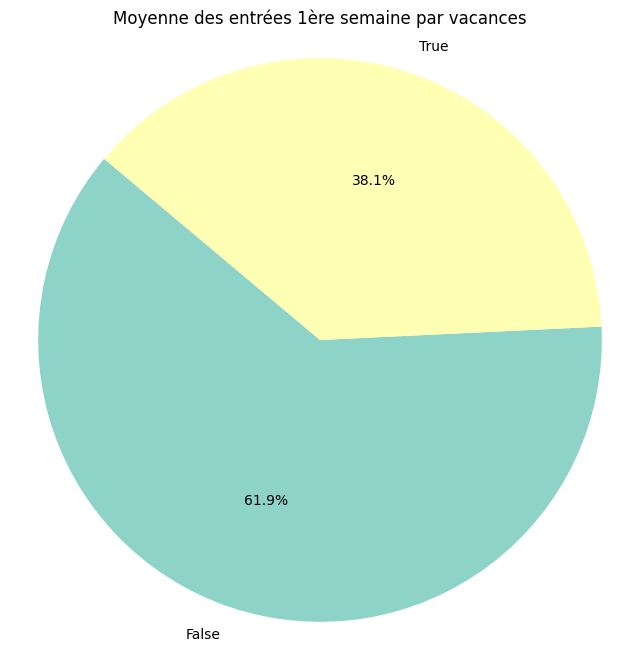

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer un DataFrame à partir du résultat
df_moyennes = moyenne_par_vacances.reset_index()

# Définir les données pour le pie chart
valeurs = df_moyennes['Entrées_1ère_semaine']
labels = df_moyennes['vacances']
couleurs = plt.cm.Set3.colors  # Vous pouvez changer les couleurs ici en utilisant d'autres palettes

# Créer le pie chart
plt.figure(figsize=(8, 8))  # Réglez la taille du diagramme en fonction de vos préférences
plt.pie(valeurs, labels=labels, colors=couleurs, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Permet de s'assurer que le diagramme est circulaire
plt.title('Moyenne des entrées 1ère semaine par vacances')
plt.show()



 <font color='blue'><h2> 3-Entrées et durées </h2></font>


In [73]:
merged_df =  merged_df[merged_df['duree']<300]

/tmp/ipykernel_5465/1263472011.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['periode_duree'] = pd.cut(df['duree'], bins=bins, labels=labels)


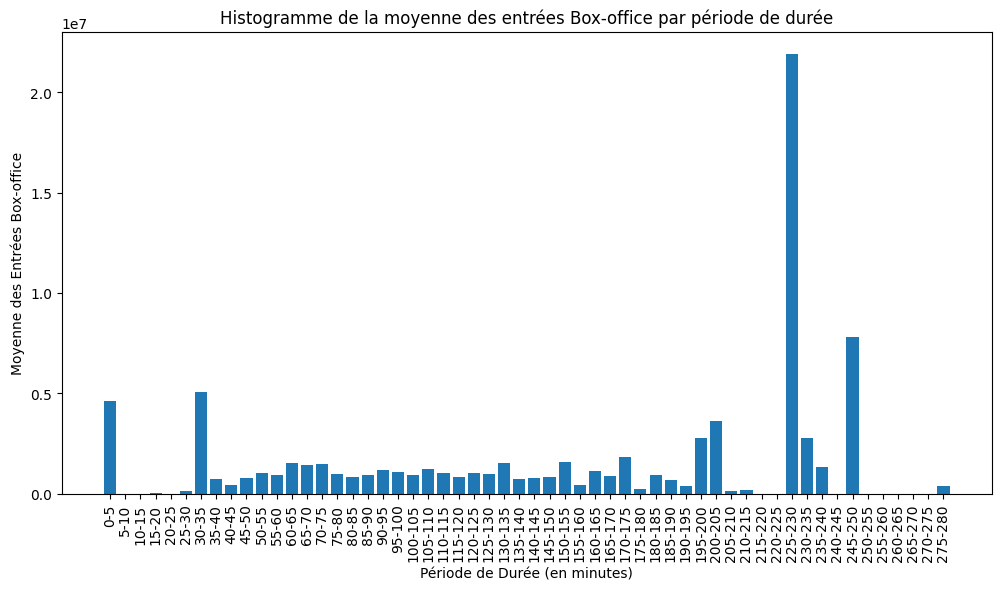

In [74]:
# Créez des bins de largeur 5 pour la colonne 'duree'
bins = list(range(merged_df['duree'].min(), merged_df['duree'].max() + 6, 5))
labels = [f"{i}-{i+5}" for i in bins[:-1]]  # Créez des labels pour chaque bin

# Ajoutez une nouvelle colonne indiquant la période de durée à laquelle chaque film appartient
merged_df['periode_duree'] = pd.cut(df['duree'], bins=bins, labels=labels)

# Calculez la moyenne des entrées 'box_office' pour chaque groupe de films basé sur la colonne 'periode_duree'
moyennes_par_periode = merged_df.groupby('periode_duree')['Entrées_1ère_semaine'].mean()

# Créer l'histogramme à partir des périodes de durée et de leurs moyennes d'entrées 'box_office'
plt.figure(figsize=(12, 6))  # Réglez la taille du graphique en fonction de vos préférences
plt.bar(moyennes_par_periode.index, moyennes_par_periode.values)
plt.xlabel('Période de Durée (en minutes)')
plt.ylabel('Moyenne des Entrées Box-office')
plt.title('Histogramme de la moyenne des entrées Box-office par période de durée')
plt.xticks(rotation=90)  # Inclinez les étiquettes pour les rendre lisibles
plt.show()


In [75]:
# Remplacer df par merged_df dans les expressions
merged_df[(merged_df['duree'] > 190) & (merged_df['duree'] <= 195)]['Entrées_1ère_semaine'].mean()
merged_df[(merged_df['duree'] > 140) & (merged_df['duree'] <= 145)]['Entrées_1ère_semaine'].mean()


497416.8470588235


 <font color='blue'><h2> 4-Distribution normale nombre des fimes par durée </h2></font>


/tmp/ipykernel_5465/3159205670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['periode_duree'] = pd.cut(df['duree'], bins=bins, labels=labels)


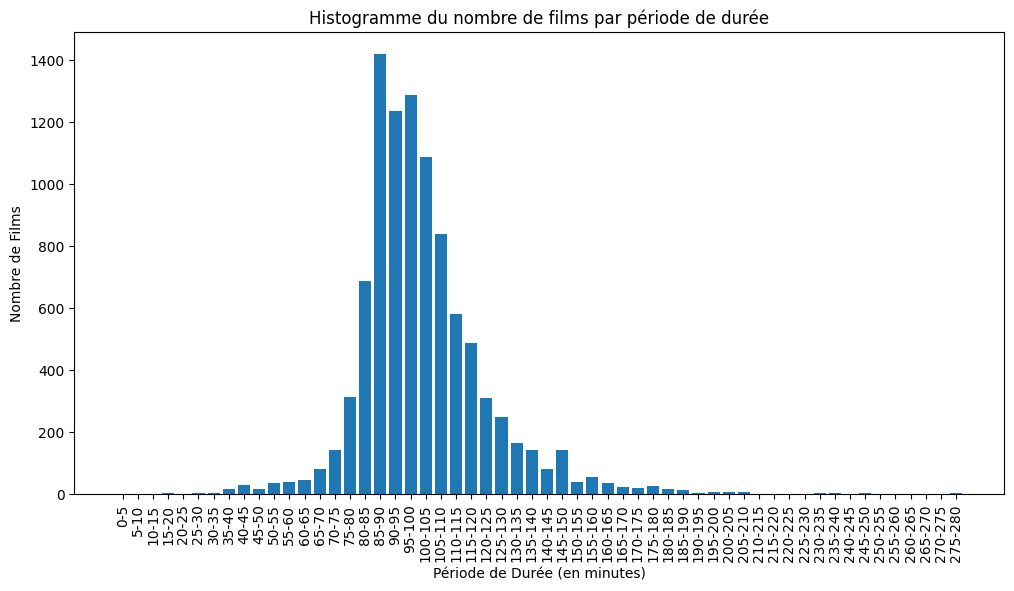

In [76]:
# Créez des bins de largeur 5 pour la colonne 'duree'
bins = list(range(merged_df['duree'].min(), merged_df['duree'].max() + 6, 5))
labels = [f"{i}-{i+5}" for i in bins[:-1]]  # Créez des labels pour chaque bin

# Ajoutez une nouvelle colonne indiquant la période de durée à laquelle chaque film appartient
merged_df['periode_duree'] = pd.cut(df['duree'], bins=bins, labels=labels)

# Comptez le nombre de films dans chaque bin de durée
nombre_films_par_periode = merged_df['periode_duree'].value_counts().sort_index()

# Créer l'histogramme à partir du nombre de films dans chaque bin de durée
plt.figure(figsize=(12, 6))  # Réglez la taille du graphique en fonction de vos préférences
plt.bar(nombre_films_par_periode.index, nombre_films_par_periode.values)
plt.xlabel('Période de Durée (en minutes)')
plt.ylabel('Nombre de Films')
plt.title('Histogramme du nombre de films par période de durée')
plt.xticks(rotation=90)  # Inclinez les étiquettes pour les rendre lisibles
plt.show()
